In [1]:
# Set up the imports
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
# 1 variable gradient decent
'''
This function takes 4 arguments and additional 2 default arguments to calculate the gradient decent
The logic is simple use the gradient decent formula till the minimum is reached, when the minimum is reached the 
distance between the current point and previous point will be a lot less and thus under certain error margin break
the loop or iterated to the number of iterations specified.

I also iter through the range specified using np.linspace and a for loop.
'''
def gradient_descent_for_1var(func, derivative, start_point_range, learning_rate, precesion=1e-6, max_iterations=10000):
    st = np.linspace(start_point_range[0],start_point_range[1],100)
    function_values = []
    point_values = []
    for start_point in st:
        current_point = start_point
        for i in range(max_iterations):
            prev_point = current_point
            gradient = derivative(current_point)
            current_point -= learning_rate * gradient
            if abs(current_point - prev_point) < precesion:
                break
        point_values.append(current_point)
        function_values.append(func(current_point))
    return min(function_values),point_values[function_values.index(min(function_values))]

In [3]:
# 2 variable gradient decent
'''
Pythagores function to find the distance between two points
'''
def pythagores(x1,y1,x2,y2):
    distance = np.sqrt((x1-x2)**2 + (y1-y2)**2)
    return distance

'''
This logic is same as 1 variable case just done twice for x variable and y variable
'''
def gradient_descent_for_2variables(func, derivative_x,derivative_y,start_point_x_range,start_point_y_range, learning_rate, precesion=1e-6, max_iterations=10000):
    st_x = np.linspace(start_point_x_range[0],start_point_x_range[1],100)
    st_y = np.linspace(start_point_y_range[0],start_point_y_range[1],100)
    
    x_vals,y_vals,z_vals = [],[],[]
    for start_point_x,start_point_y in zip(st_x,st_y):
    
        current_point_x,current_point_y = start_point_x,start_point_y
        for i in range(max_iterations):
            prev_point_x,prev_point_y = current_point_x,current_point_y
            gradient_x,gradient_y = derivative_x(current_point_x,prev_point_y),derivative_y(prev_point_x,current_point_y)

            current_point_x -= learning_rate * gradient_x
            current_point_y -= learning_rate * gradient_y

            if (pythagores(current_point_x,current_point_y,prev_point_x,prev_point_y)) < precesion:
                break
        x_vals.append(current_point_x),y_vals.append(current_point_y)
        z_vals.append(func(current_point_x,current_point_y))
        points = list(zip(x_vals,y_vals))
    return min(z_vals),points[z_vals.index(min(z_vals))]
        

In [4]:
# Multi variable gradient decent
'''
The logic follows the exact same as of the single variable gradient decent but instead of using number I use
numpy arrays i.e all input (except func)arguments except default arguments are numpy arrays, this code can also 
be used for 1 variable gradient decent, just convert all the inputs in numpy arrays (except func).

The change here required is to find the distance between the points instead of subraction we can use inbulit numpy
function numpy.linalg.norm, this function by default calculates the distance between 2 numpy arrays of whatever
dimensions

Another thing is that np.linspace can only take numbers as arugments not numpy arrays, so to solve that problem I 
made a function that does the same job but for an array, i.e it takes a argument array and makes a new numpy array
result that contains the numbers between the specified range then I return the transpose of the result so the return
array rows contains starting points for the iteration in classical gradient decent

example: [[1,2],[1,3]](first row range of x[0] and second row as range of x[1]
will have result as [[1,1.5,2],[1,2,3]] and return value as [[1,1],[1.5,2],[2,3]] 
'''


def linspace_array(input_arr, num=10):
    result = np.zeros((input_arr.shape[0], num))
    for i, row in enumerate(input_arr):
        result[i] = np.linspace(row[0], row[1], num=num)
    return result.T



def gradient_descent_multivar(func, derivative, start_point_range, learning_rate, error=1e-6, max_iterations=100000):
    st = linspace_array(start_point_range, num=50)
    min_point = None
    min_value = np.inf
    for start_point in st:
        current_point = start_point
        for i in range(max_iterations):
            prev_point = current_point
            gradient = derivative(current_point)
            #current_point -= learning_rate * gradient
            current_point = current_point - learning_rate * gradient
            if np.linalg.norm(current_point - prev_point) < error:
                break
        value = func(current_point)
        if value < min_value:
            min_value = value
            min_point = current_point
    return min_value, min_point

# Problem 1  1d simple 

In [5]:
# Test case
'''
This is an example of 1 variable gradient decent with appropiate learning rate and starting point
'''
# Define your function and derivative

def f1(x):
    return x ** 2 + 3 * x + 8

def f2(x):
    return 2*x + 3

def f1_d(x):
    return x[0] ** 2 + 3 * x[0] + 8

def f2_d(x):
    return np.array([2*x[0] + 3])
    
# Define the starting point and learning rate

start_point = 0
learning_rate = 0.01

# Use the gradient_descent function to find the minimum

minimum,point = gradient_descent_for_1var(f1, f2, [-5,5], learning_rate)
minimum2,point2 = gradient_descent_multivar(f1_d,f2_d,np.array([[-5,5]]),learning_rate)
print(f'Minium value of function using gradient_descent_for_1var:{minimum}')
print(f'Point at which minimum is found:{point}')
print()

print(f'Minium value of function using gradient_descent_for_multivar:{minimum2}')
print(f'Point at which minimum is found:{point2[0]}')

Minium value of function using gradient_descent_for_1var:5.7500000023063915
Point at which minimum is found:-1.499951975102435

Minium value of function using gradient_descent_for_multivar:5.750000002312454
Point at which minimum is found:-1.5000480879897555


# Problem 2 2d polynomial

In [6]:
# Test Case for 2 vaiable gradient decent
xlim3 =  [-10, 10]
ylim3 =  [-10, 10]
starting_point_range = np.array([[-10,10],
                                 [-10,10]])

def f3(x, y):
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

def df3_dx(x, y):
    return 4*x**3 - 48*x**2 + 192*x - 256

def df3_dy(x, y):
    return 2*y - 4

def f3_mul(x):
    return x[0]**4 - 16*x[0]**3 + 96*x[0]**2 - 256*x[0] + x[1]**2 - 4*x[1] + 262

def df3_mul(x):
    return np.array([4*x[0]**3 - 48*x[0]**2 + 192*x[0] - 256,
                    2*x[1] - 4])



z_min,points = gradient_descent_for_2variables(f3, df3_dx,df3_dy,xlim3,ylim3, 0.001) 
z_min2,points2 = gradient_descent_multivar(f3_mul, df3_mul,starting_point_range, 0.001) 
print(f'Minimum value of function using gradient_descent_for_2variables:{z_min}')
print(f'Point at minimum of the  function:{points} as (x,y)')
print()

print(f'Minimum value of function using gradient_descent_multivar:{z_min2}')
print(f'Point at minimum of the  function:{points2[0], points2[1]} as (x,y)')

Minimum value of function using gradient_descent_for_2variables:2.00001072887693
Point at minimum of the  function:(3.9429168247256063, 2.0003333571760282) as (x,y)

Minimum value of function using gradient_descent_multivar:2.0000157470199156
Point at minimum of the  function:(3.9370059408549145, 1.9999999999999445) as (x,y)


# Problem 3 2d polynomial

In [7]:
xlim4 = [-np.pi, np.pi]
ylim4 = [-np.pi,np.pi]
starting_point_range = np.array([[-np.pi,np.pi],
                                 [-np.pi,np.pi]])
def f4(x,y):
    return np.exp(-(x - y)**2)*np.sin(y)

def f4_dx(x, y):
    return -2*np.exp(-(x - y)**2)*np.sin(y)*(x - y)

def f4_dy(x, y):
    return np.exp(-(x - y)**2)*np.cos(y) + 2*np.exp(-(x - y)**2)*np.sin(y)*(x - y)

#################################
def f4_mul(x):
    return np.exp(-(x[0] - x[1])**2)*np.sin(x[1])

def df4_mul(x):
    return np.array([-2*np.exp(-(x[0] - x[1])**2)*np.sin(x[1])*(x[0] - x[1]),
                    np.exp(-(x[0] - x[1])**2)*np.cos(x[1]) + 2*np.exp(-(x[0] - x[1])**2)*np.sin(x[1])*(x[0] - x[1])])


z_min, points = gradient_descent_for_2variables(f4, f4_dx,f4_dy,xlim4,ylim4, 0.1)  
z_min2, points2 = gradient_descent_multivar(f4_mul, df4_mul,starting_point_range, 0.1)  

print(f'Minimum value of function:{z_min}')
print(f'Point at minimum of the  function:{points}')
print()
print(f'Minimum value of function using gradient_descent_multivar:{z_min2}')
print(f'Point at minimum of the  function:{points2[0],points2[1]}')

Minimum value of function:-0.9999999999046567
Point at minimum of the  function:(-1.5707798890935616, -1.5707834926255189)

Minimum value of function using gradient_descent_multivar:-0.9999999999045455
Point at minimum of the  function:(-1.570779879516694, -1.5707834851481268)


## Problem 4 - 1-D trigonometric

In [8]:
def f5(x):
    return np.cos(x)**4 - np.sin(x)**3 - 4*np.sin(x)**2 + np.cos(x) + 1

def d_fun(x):
    h = 1e-6
    der_foo = (f5(x) - f5(x-h))/h
    return der_foo
############################
def f5_mul(x):
    return np.cos(x[0])**4 - np.sin(x[0])**3 - 4*np.sin(x[0])**2 + np.cos(x[0]) + 1

def d_fun_mul(x):
    h = np.array([1e-6])
    der_foo = (f5_mul(x) - f5_mul(x-h))/h
    return np.array([der_foo])


minimum ,point = gradient_descent_for_1var(f5, d_fun, [0,2*np.pi], 0.1)
minimum2 ,point2 = gradient_descent_multivar(f5_mul, d_fun_mul, np.array([[0,2*np.pi]]), 0.1)
print(f'Minium value of function:{minimum}')
print(f'Point at which minimum is found:{point}')
print()
print(f'Minium value of function using gradient_descent_multivar:{minimum2}')
print(f'Point at which minimum is found:{point2[0]}')

Minium value of function:-4.045412051571511
Point at which minimum is found:1.6616612476691166

Minium value of function using gradient_descent_multivar:[-4.04541205]
Point at which minimum is found:[1.66166126]


# Test case for multi variable case

In [9]:
#  Test case

'''
Usage:

the function whose gradient decent is to be calculated should only take 1 argument (here x) as input which is a 
1 dimensional numpy array that contains x_i'th variable at i'th postion

example: sin(x) + cos(y) should be coded as sin(x[0]) + cos(x[1])
'''
def funcz(x):
    return x[0]**2 + x[1]**2 + x[2]**2 - 2*x[0] - 4*x[1] - 6*x[2] + 10
    #return np.sin(x[0]) + np.cos(x[1])

'''
The derivative of the function should return a numpy array of 1 dimenstion whose length is same as x(input array to
function), where the i'th position has partial derivative of x_i'th variable

'''

def deri(x):
    return np.array([2*x[0] - 2,
                     2*x[1] - 4,
                     2*x[2] - 6])
    #return np.array([np.cos(x[0]), -np.sin(x[1])])

'''
The range should be given as a 2-dimension numpy array of length n
example: [[1,2],[1,3]](first row range of x[0] and second row as range of x[1]
'''
# Define the starting point and learning rate
start_point_range = np.array([[-5, 5],[-5, 5],[-5,5]])
#start_point_range = np.array([[-5, 5],[-5, 5]])
learning_rate = 0.1

# Use the gradient_descent function to find the minimum
minimum, point= gradient_descent_multivar(funcz, deri, start_point_range, learning_rate)


print(f"Minimum value found: {minimum}")
print(f'Point at which minimum is found:{point}')

Minimum value found: -3.9999999999896474
Point at which minimum is found:[0.99999857 1.99999817 2.99999777]


In [10]:
# Visiulisation for 2 variable gradient decent

# Define the function and its derivative
'''
Do not change the names of the func and derivative as this is visiulatzation I have not make this in form of
a callable function but as code block, so naming is important.

The function should be made in same way as multi-variable case, i.e x[0] and x[1] represent x0 and x1 variables
respectively

example: sin(x) + cos(y) should be coded as sin(x[0]) + cos(x[1])
'''
def function_2d(x):
    return np.exp(-(x[0] - x[1])**2)*np.sin(x[1])
    #return x[0]**2 + x[1]**2

def derivative_2d(x):
    return np.array([-2*np.exp(-(x[0] - x[1])**2)*np.sin(x[1])*(x[0] - x[1]),
                     np.exp(-(x[0] - x[1])**2)*np.cos(x[1]) + 2*np.exp(-(x[0] - x[1])**2)*np.sin(x[1])*(x[0] - x[1])])
    #return np.array([2*x[0],2*x[1]])


start_point = np.array([3, 3])
learning_rate = 0.1

<IPython.core.display.Javascript object>


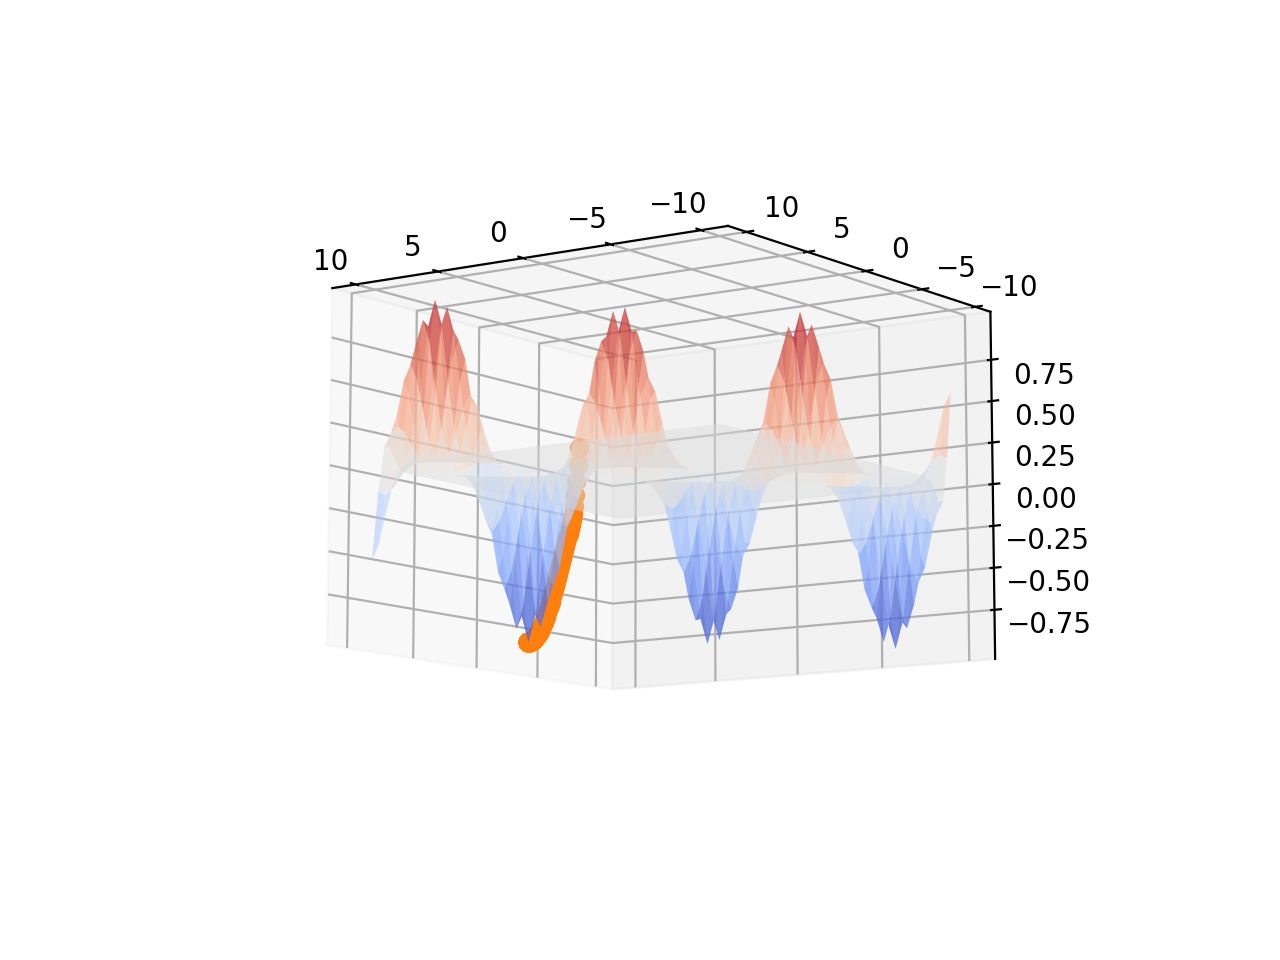

x:4.7123714398708865,y:4.712375285165356,z:-0.9999999998914342


In [11]:
 # Set up the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xline_max,xline_min = start_point[0], -start_point[0]
yline_max,yline_min = start_point[1], -start_point[1]

x_grid, y_grid = np.meshgrid(np.linspace(-10, 10, 50), np.linspace(-10, 10, 50))

'''Changes function name here'''
z_grid = np.array([[function_2d([x, y]) for x, y in zip(x_row, y_row)] for x_row, y_row in zip(x_grid, y_grid)]) 

# Set up the plot data
surf = ax.plot_surface(x_grid, y_grid, z_grid, cmap='coolwarm', alpha=0.5)
line, = ax.plot([], [], [], 'o', lw=2)

def update22(i, path):
        # Update the line data
        line.set_data(path[:i, 0], path[:i, 1])
        '''Changes function name here'''
        line.set_3d_properties(function_2d(path[:i, :].T))
        return line,

def gradient_descent_2_variables(func, derivative, start_point, learning_rate, max_iters=1000, error_margin=1e-6):
        path = [start_point]
        for i in range(max_iters):
            current_point = path[-1]
            gradient = derivative(current_point)
            new_point = current_point - learning_rate * gradient
            if np.linalg.norm(new_point - current_point) < error_margin:
                break
            path.append(new_point)
        return np.array(path)
    
'''Changes function name here'''
path = gradient_descent_2_variables(function_2d, derivative_2d, start_point, learning_rate)
anim = FuncAnimation(fig, update22, frames=len(path) + 1, interval=200, blit=True, fargs=(path,),repeat=False)

# Assign the animation to a variable and show the plot
display_animation = anim
plt.show()
print(f'x:{path[-1][0]},y:{path[-1][1]},z:{function_2d(path[-1])}')